In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [5]:
df.shape

(42000, 785)

In [6]:
#checking image files show correct
import matplotlib.pyplot as plt

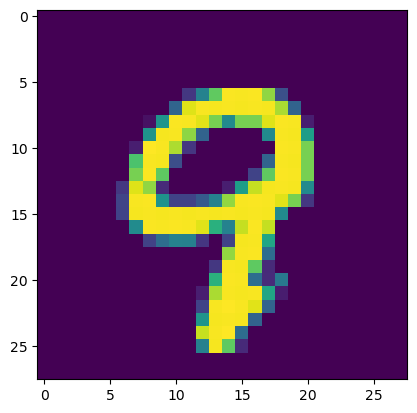

In [7]:
plt.imshow(df.iloc[1305,1:].values.reshape(28,28))

In [8]:
#Extract Value in X and Y(Column Selection)
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [9]:
X.shape

(42000, 784)

In [13]:
#Model Selection
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [14]:
X_train.shape

(33600, 784)

In [15]:
#Data centering
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# making object
knn = KNeighborsClassifier()

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [21]:
import time 
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

13.557714700698853


In [22]:
#checking Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [23]:
#Using Preprocessing mean center
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [25]:
#Using PCA reduce the Data columns and find the best number columns with high accuracy
from sklearn.decomposition import PCA

In [28]:
#Selecting All columns first time
pca = PCA(n_components=None)  #n_components can be anything 

In [29]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [30]:
X_train.shape

(33600, 784)

In [31]:
#Selecting 200 columns first time
pca = PCA(n_components=200)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [32]:
X_train_trf.shape

(33600, 200)

In [33]:
knn = KNeighborsClassifier()

In [34]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [35]:
y_pred = knn.predict(X_test_trf)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,y_pred)

0.6675

In [38]:
#Create a loop to check at what Column count model give best accuracy to check beeter Outcome
#Accouracy stop chose = 95% becoz if not then it goes till all colmn till highest accuracy %


In [39]:
for i in range(1, 785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)
    y_pred = knn.predict(X_test_trf)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy, "n_components:", i)
    
    if accuracy > 0.95:
        print("Accuracy above 95% achieved. Breaking the loop.")
        break
        #break on 95% if not then it will run till 784 times till this will end

Accuracy: 0.2638095238095238 n_components: 1
Accuracy: 0.32511904761904764 n_components: 2
Accuracy: 0.51 n_components: 3
Accuracy: 0.6633333333333333 n_components: 4
Accuracy: 0.7391666666666666 n_components: 5
Accuracy: 0.8235714285714286 n_components: 6
Accuracy: 0.8438095238095238 n_components: 7
Accuracy: 0.8721428571428571 n_components: 8
Accuracy: 0.8848809523809524 n_components: 9
Accuracy: 0.9054761904761904 n_components: 10
Accuracy: 0.9126190476190477 n_components: 11
Accuracy: 0.9170238095238096 n_components: 12
Accuracy: 0.925952380952381 n_components: 13
Accuracy: 0.9341666666666667 n_components: 14
Accuracy: 0.9367857142857143 n_components: 15
Accuracy: 0.9375 n_components: 16
Accuracy: 0.9402380952380952 n_components: 17
Accuracy: 0.9401190476190476 n_components: 18
Accuracy: 0.9419047619047619 n_components: 19
Accuracy: 0.9442857142857143 n_components: 20
Accuracy: 0.9447619047619048 n_components: 21
Accuracy: 0.9435714285714286 n_components: 22
Accuracy: 0.94369047619

In [50]:
# transforming to a #2d Coordinate system 
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)


In [51]:
X_train_trf

array([[-2.71864545, -0.49000609],
       [-0.6769192 , -6.75317587],
       [-3.03322412,  6.5099535 ],
       ...,
       [ 2.14884896,  0.78092391],
       [ 1.0595188 ,  0.94713496],
       [17.70250391,  1.9613436 ]])

In [52]:
import plotly.express as px 
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                 )

fig.show()

In [54]:
# transforming to a #3d Coordinate system 
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [55]:
X_train_trf

array([[-2.71861292, -0.48994322,  1.1352956 ],
       [-0.67695603, -6.75371488, -2.33602048],
       [-3.03323938,  6.5099265 ,  7.4921677 ],
       ...,
       [ 2.14884545,  0.78098471, -0.74703431],
       [ 1.05960009,  0.94760095,  3.94945096],
       [17.70267315,  1.96192218, -4.94382992]])

In [59]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
                 color=y_train_trf)
fig.update_layout(
    margin=dict(l=20 , r=20 , b=20 )
)

fig.show()

In [62]:
#eigen values
pca.explained_variance_

array([40.67111197, 29.170234  , 26.74459616])

In [64]:
#eigen vertors 
pca.components_

array([[-9.66850031e-18, -4.75305508e-18, -2.39292805e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 5.84060095e-17,  4.53997183e-17, -2.07356571e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 3.89386028e-17,  6.34131404e-17,  4.87902417e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [66]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [69]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [70]:
pca.explained_variance_.shapeape

(784,)

In [71]:
pca.components_.shape

(784, 784)

In [73]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

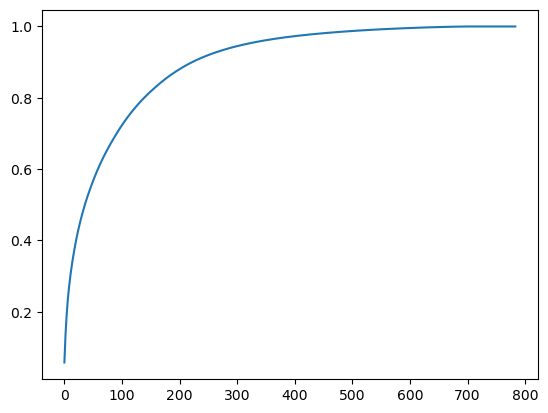

In [75]:
#after a certain point the accuracy rate is not increarsing 
plt.plot(np.cumsum(pca.explained_variance_ratio_))